## Project  2: Data Exploration and Design
## 605.662 Data Visualization
## Ricca Callis

## Directions

### I. Purpose:

The purpose of this assignment is to introduce you to the process of exploring and visually
analyzing data without even having to develop a visualization tool. You will pick a domain and
dataset that you are interested in. The data should have at least 10 variables (i.e. columns) and
1,000 records (i.e. rows). The purpose of this assignment is to design different visualizations to
illustrate individual aspects of the dataset under consideration.

### II. Task:

1. Find a dataset of interest to you. Minimum dataset: 10 variables x 1000 records

2. Explore and analyze the data using Excel, R, Python, Matlab, SPSS, Google Spreadsheets,
or a calculator. To do this, please create a table that describes each of the data elements,
list their category (nominal, ordinal, quantitative, etc…), and provide some statistics
about each of the data elements (e.g. min, max, std, mode, categories, etc…)


3. List five analytical questions that users examining the data might be wondering.

4. By using markers, pen and/or pencils, please sketch different visualizations that can be
used to address some of the analytical questions. Specifically, of the five analytical
questions, select three of them and sketch three different visualizations for each of them.
(i.e. 3 analytical questions x 3 visualizations = 9 visualizations). No programming needed.

5. Write one paragraph for each of the 9 drawings / sketches explaining the design, the
purpose, and the logic behind your design.

### III. Useful Links

• Visualizations
o https://github.com/d3/d3/wiki/Gallery
o https://public.tableau.com/en-us/s/gallery
o http://christopheviau.com/d3list/gallery.html
o https://bost.ocks.org/mike/
o http://textvis.lnu.se/

• Datasets (Tip: Find a dataset that interests you.)
o www.kaggle.com/datasets
o https://catalog.data.gov/dataset
o https://github.com/awesomedata/awesome-public-datasets
o Cereal dataset: http://davis.wpi.edu/xmdv/datasets/cereal.html
o http://nwdata.org
o http://www.scribblelive.com/blog/2012/03/30/data-sources/
o https://www.ons.gov.uk
o http://datacatalog.worldbank.org
o http://rhythm-of-food.net
o http://flowingdata.com

### IV. What to submit

• Document (2 - N pages) describing the data, analytical questions, and the 9 visualizations
designed for three of the analytical questions. Document must include screenshots of the
drawings, visualizations, or illustrations.
• Submit document through Blackboard. Please use the following file format:
your_lastname_project02.docx or your_lastname_project02.pdf

### V. Grading

Students will be evaluated based on the quality of the work, logic, clarity, and effort put into the
design. Specifically,
• What dataset was used? There are no right or wrong datasets, but put effort in
finding something of interest to you while meets the data requirements.
• How well the data was explored and described? Mean, standard deviation, median,
max, etc…? Is there a table listing the elements?
• Quality of the five analytical questions that users examining the data might be
wondering.
• Logic of the 9 designs, sketches, pictures, or visualizations proposed to explore the
dataset
• Write-up and overall justification.

In [1]:
# Author: Ricca Callis
# EN 605.662 Data Visualization
# Project #2
# Date Created: 11/9/2020
# File name: Project 2 - Callis.ipynb
# Python Version: 3.7.5
# Jupyter Notebook: 6.0.1
# Description: Explore and visually analyze data without even having to develop a visualization tool. 
# Specifically, the purpose of this assignment is to design different visualizations to illustrate 
# individual aspects of the CDC 500 Cities Census data set.


""" 
Required Data Set:
    500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release.csv   
""" 


' \nRequired Data Set:\n    500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release.csv   \n'

In [2]:
from platform import python_version
print ( python_version() )

3.7.5


In [163]:
# Common standard libraries
import datetime
import time
import os
# Common external libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import sklearn #scikit-learn
import sklearn
from sklearn.model_selection import train_test_split 
import random as py_random
import numpy.random as np_random
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import scipy.stats as stats
from toolz import pipe # pass info from one process to another (one-way communication)
from typing import Callable
from collections import Counter, OrderedDict
import re #regex as re
import math
import json
from sklearn.model_selection import train_test_split
import logging
from scipy.stats import skew, skewtest, boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler

#logging.basicConfig ( filename ='logfile.txt' )
#logging.root.setLevel ( logging.INFO )
#logger = logging.getLogger ( __name__ )

In [15]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
#Helper functions

def freeman_diaconis ( data ):
    quartiles = stats.mstats.mquantiles ( data, [ 0.25, 0.5, 0.75 ] )
    iqr = quartiles[ 2 ] - quartiles [ 0 ]
    n = len ( data )
    h = 2.0 * ( iqr / n ** ( 1.0 / 3.0 ) )
    return int ( h )

def get_bins ( data ):
    h = freeman_diaconis ( data )
    mn = int ( data.min() )
    mx = int ( data.max() )
    bins = [ i for i in range ( mn, mx, h ) ]
    return bins

def correlations ( data, y, xs ):
    rs = []
    rhos = []
    for x in xs:
        r = stats.pearsonr ( data [ y ], data [ x ] ) [ 0 ]
        rs.append ( r )
        rho = stats.spearmanr ( data [ y ], data [ x ] ) [ 0 ]
        rhos.append ( rho )
    return pd.DataFrame ( { "feature": xs, "r": rs, "rho": rhos } )

#Scatter plot of model
def scatter_plot_lm ( Y, intercept, X1, beta_1, title ):
    figure = plt.figure ( figsize = ( 10, 6 ) ) #figsize = (width, height)
    axes = figure.add_subplot ( 1, 1, 1 )
    axes.scatter ( X1, Y, color = 'steelblue', alpha = 0.5 )
    axes.plot( X1, [ intercept + beta_1 * x for x in X1 ], '-', color = 'firebrick', alpha = 0.75 )
    axes.set_title ( title )
    axes.set_ylabel ( 'Y' )
    axes.set_xlabel ( 'X1' )
    plt.show()
    plt.close()

#Residual Plot
def scatter_plot_residuals ( residuals, title, X = None ):
    figure = plt.figure ( figsize = ( 10, 6 ) ) #figsize = (width, height)
    axes = figure.add_subplot ( 1, 1, 1 )
    
    #Residual scatter plot
    if X is None:
        axes.plot ( range ( 0, len ( residuals ) ), residuals, 'o', color = 'steelblue', alpha = 0.75 )
    #Residuals v X
    else:
        axes.plot ( X, residuals, 'o', color = 'steelblue', alpha = 0.75 )
        axes.set_xlabel ( 'X' )
    limits = max ( np.abs ( residuals.min() ), residuals.max() )
    axes.axhline ( y = 0.0, xmin = 0, c = 'firebrick', alpha = 0.5 )
    axes.set_ylim ( ( -limits, limits ) )
    axes.set_title ( title )
    axes.set_ylabel ( 'Residual' )
    plt.show()
    plt.close()
    
def residual_plots ( data, results, features, y ):
    intercept = results [ 'coefficients' ][ 0 ]
    beta_1 = results [ 'coefficients' ][ 1 ]
    for feature in features:
        title = 'Residuals for {0} against {1}'.format ( results [ 'formula' ], feature )
        scatter_plot_residuals ( residuals = results [ 'residuals' ], X = data [ feature ], title = title )

In [16]:
# Check current directory
currentDirectory = os.getcwd()
print ( currentDirectory )

/Users/riccacallis/Desktop/JHU/Data Science/Data Visualization/Project 2/Input


In [17]:
# Input data files are available in the ".../input/" directory
# Change the Current working Directory
os.chdir ( '/Users/riccacallis/Desktop/JHU/Data Science/Data Visualization/Project 2/input' )

# Get Current working Directory
currentDirectory = os.getcwd()
print ( currentDirectory )

/Users/riccacallis/Desktop/JHU/Data Science/Data Visualization/Project 2/Input


In [18]:
# List files in input directory
from subprocess import check_output
print ( check_output ( [ "ls", "../input" ] ).decode ( "utf8" ) )

500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release.csv



In [19]:
# Set seed
def set_seed ( seed ):
    np.random.seed ( seed )
    random.seed ( seed )

# Data Set
# CDC 500 Cities: Census Tract-level Data (2019)
## Description

Data obtained from: https://chronicdata.cdc.gov/500-Cities/500-Cities-Census-Tract-level-Data-GIS-Friendly-Fo/k86t-wghb

This project reports city and census tract-level data, obtained using small area estimation methods, for 27 chronic disease measures for the 500 largest American cities.

### Cities

The project will deliver data for the 497 largest American cities and will include data from the largest cities in Vermont (Burlington – population: 42,417), West Virginia (Charleston – population: 51,400) and Wyoming (Cheyenne – population: 59,466) to ensure inclusion of cities from all the states; bringing the total to 500 cities.

The number of cities per state ranges from 1 to 121.

The cities range in population from 42,417 in Burlington, Vermont to 8,175,133 in New York City, New York.
Among these 500 cities, there are approximately 28,000 census tracts, for which data will be provided. The tracts range in population from less than 50 to 28,960, and in size from less than 1 square mile to more than 642 square miles. The number of tracts per city ranges from 8 to 2,140.

The project includes a total population of 103,020,808, which represents 33.4% of the total United States population of 308,745,538.

List of 500 Cities: https://www.cdc.gov/500cities/pdf/500-Cities-Listed-by-State.pdf

### Chronic Disease Measures

Chronic disease measures are related to unhealthy behaviors (5), health outcomes (13), and use of preventive services (10). The measures include major risk behaviors that lead to illness, suffering, and early death related to chronic diseases and conditions, as well as the conditions and diseases that are the most common, costly, and preventable of all health problems.

   **Unhealthy Behaviors:** https://www.cdc.gov/500cities/definitions/unhealthy-behaviors.htm
    
        1. Binge drinking among adults aged ≥18 years
        2. Current smoking among adults aged >=18 years
        3. No leisure-time physical activity among adults aged >=18 years
        4. Obesity among adults aged >=18 years
        5. Sleeping less than 7 hours among adults aged >=18 years
        
   **Health Outcomes:** https://www.cdc.gov/500cities/definitions/health-outcomes.htm
   
        1. Arthritis among adults aged >=18 years
        2. Current asthma among adults aged >=18 years
        3. High blood pressure among adults aged >=18 years
        4. Cancer among adults aged ≥18 years
        5. High cholesterol among adults aged >=18 years who have been screened in the past 5 years
        6. Chronic kidney disease among adults aged ≥18 years
        7. Chronic obstructive pulmonary disease among adults aged >=18 years
        8. Coronary heart disease among adults aged ≥18 years
        9. Diagnosed diabetes among adults aged >=18 years
        10. Mental health not good for >=14 days among adults aged >=18 years
        11. Physical health not good for >=14 days among adults aged >=18 years
        12. All teeth lost among adults aged >=65 years
        13. Stroke among adults aged >=18 years
        
   **Use of Preventative Services:** https://www.cdc.gov/500cities/definitions/prevention.htm
   
        1. Current lack of health insurance among adults aged 18–64 years
        2. Visits to doctor for routine checkup within the past year among adults aged ≥18 years
        3. Visits to dentist or dental clinic among adults aged ≥18 years
        4. Taking medicine for high blood pressure control among adults aged ≥18 years with high blood pressure
        5. Cholesterol screening among adults aged ≥18 years
        6. Mammography use among women aged 50-74 years
        7. Papanicolaou smear use among adult women aged 21-65 years
        8. Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50–75 years
        9. Older men aged ≥65 years who're up to date on a core set of clinical preventive services
        10. Older women aged ≥65 years who're up to date on a core set of clinical preventive services

## Extract, Transform, Load Data
### 27.2 Rows, 63 Columns
### Attribute Information: 57 Attributes (Dependent Variables)

1. **Population:** 2010 Cencus population count

    - Time Period: 2010
    - Data Type: Numeric; Integer
    - Variable Type: Quantitative; Ratio; Continuous
    
    
2. **Access:** Lack of health insurance

    - Calculation:
    $\frac {\text {# of Respondents aged 18–64 years who report having no current health insurance coverage}} {\text {# of respondents ages 18-64}}$
    
    
    - Metric Category: Use of Preventative Services
    - Frequency: Annual prevalance 
    - Time Period of Case Definition: Current
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
3. **Access95CI:** Confidence interval for Access metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
4. **Arthritis:** Diagnosed with Arthritis

    - Calculation: 
    $\frac {\text {# of respondents aged 18–64 years who report having no current health insurance coverage}} {\text {# of respondents ages 18-64}}$
    
    
    - Metric Category: Health Outcome
    - Frequency:Annual prevalance
    - Time Period of Case Definition: Lifetime
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
5. **Arthritis95CI:** Confidence interval for Arthritis metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
6. **Binge:** Binge drinking among adults aged ≥ 18 years

    - Calculation: 
    $\frac {\text {# of adults aged ≥18 years who report having five or more drinks (men) or four or more drinks (women) on an occasion in the past 30 days}} {\text {# of Adults aged ≥18 years who report having a specific number, including zero, of drinks on an occasion in the past 30 days}}$
    
    
    - Metric Category: Unhealthy Behavior
    - Frequency: Annual prevalance
    - Time Period of Case Definition: Past 30 days
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
7. **Binge95CI:** Confidence interval for Binge metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
8. **BPHigh:** High blood pressure among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years with high bloodpressure}} {\text {# of respondents aged ≥18 years}}$
    
    
    - Metric Category: Health Outcome
    - Frequency: Biennial (odd years) prevalence: crude and age adjusted (standardized by the direct method to the year 2000 standard U.S. population, distribution 9) with 95% confidence intervals and by demographic characteristics when feasible.
    - Time Period of Case Definition: Past year
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
9. **BPHigh95CI:** Confidence interval for BPHigh metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
10. **BPMed:** Taking medicine for high blood pressure control among adults aged ≥18 years with high blood pressure

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who report taking medicine for high blood pressure}} {\text {# of respondents aged ≥18 years who report having high blood pressure}}$
    
    
    - Metric Category: Prevention
    - Frequency: Biennial (odd years) prevalence: crude and age adjusted (standardized by the direct method to the year 2000 standard U.S. population, distribution 9) with 95% confidence intervals and by demographic characteristics when feasible.
    - Time Period of Case Definition: Previous year
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
11. **BPMed95CI:** Confidence interval for BPMed metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
12. **Cancer:** Cancer (excluding skin cancer) among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who report ever having been told by a doctor, nurse, or other health professional that they have any other types (besides skin) of cancer}} {\text {# of respondents aged ≥18 years}}$
    
    
    - Metric Category: Health Outcome
    - Frequency: Biennial (odd years) prevalence: crude and age adjusted (standardized by the direct method to the year 2000 standard U.S. population, distribution 9) with 95% confidence intervals and by demographic characteristics when feasible.
    - Time Period of Case Definition: Past year
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
13. **Cancer95CI:** Confidence interval for Cancer metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
14. **Casthma:** Current asthma prevalence among adults aged≥18 years

    - Calculation: 
    $\frac {\text {Weighted # of respondents who have been diagnosed with asthma and still have asthma}} {\text {Weighted number of respondents to BRFSS (or National Survey of Children’s Health)}}$
    
    
    - Metric Category: Health Outcome
    - Frequency: Annually
    - Time Period of Case Definition: Current Calendar Year
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
15. **Casthma95CI:** Confidence interval for Casthma metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
16. **CHD:** Coronary heart disease among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who report ever having been told by a doctor, nurse, or other health professional that they had angina or coronary heart disease}} {\text {# of respondents aged ≥18 years who report or do not report ever having been told by a doctor, nurse, or other health professional that they had angina or coronary heart disease }}$
    
    
    - Metric Category: Health Outcome
    - Frequency: Annual prevalance
    - Time Period of Case Definition: Lifetime (ever diagnosed) with angina or coronary heart disease.
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
17. **CHD95CI:** Confidence interval for CHD metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
18. **Checkup:** Visits to doctor for routine checkup within the past year among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who have been to a doctor for a routine checkup (e.g., a general physical exam, not an exam for a specific injury/illness/condition) in the previous year}} {\text {# of respondents aged ≥18 years who report or do not report having been to a doctor for a routine checkup}}$
    
    
    - Metric Category: Prevention
    - Frequency: Biennial prevalence (even years): crude and age adjusted (standardized by the direct method to the year 2000 standard U.S. population, distribution 9) with 95% confidence intervals and by demographic characteristics when feasible.
    - Time Period of Case Definition: Previous year
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
19. **Checkup95CI:** Confidence interval for Checkup metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
20. **Cholscreen:** Cholesterol screening among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who report having their cholesterol checked within the previous 5 years}} {\text {# of respondents aged ≥18 years who report having their cholesterol checked within the past 5 years }}$
    
    
    - Metric Category: Prevention
    - Frequency: Biennial (odd years) prevalence: crude and age adjusted (standardized by the direct method to the year 2000 standard U.S. population, distribution 9) with 95% confidence intervals and by demographic characteristics when feasible.
    - Time Period of Case Definition: Previous 5 years
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
21. **Cholscreen95CI:** Confidence interval for Cholscreen metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
22. **Colon_Screen:** Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50–75 years

    - Calculation: 
    $\frac {\text {# of respondents aged 50–75 years who report having had a FOBT, Sigmoidoscopy, or colonoscopy}} {\text {# of respondents aged 50–75 years who report ever having or never having an FOBT, sigmoidoscopy, or colonoscopy}}$
    
    
    - Specifically, reports asked for:
        1. A fecal occult blood test (FOBT) within the past year
        2. A sigmoidoscopy within the past 5 years and a FOBT within the past 3 years, or
        3. A colonoscopy within the past 10 years
    - Metric Category: Prevention
    - Frequency: Prevalence, crude and age adjusted (standardized by the direct method to the year 2000 standard U.S. population) with 95% confidence intervals and by demographic characteristics when feasible.
    - Time Period of Case Definition: Past year for FOBT alone, both past 5 years for sigmoidoscopy and past 3 years for FOBT, past 10 years for colonoscopy.
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
23. **Colon_Screen95CI:** Confidence interval for Colon_Screen metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
24. **COPD:** Chronic obstructive pulmonary disease among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who report being diagnosed with chronic obstructive pulmonary disease (COPD), emphysema, or chronic bronchitis}} {\text {# of respondents aged ≥18 years who report or do not report ever having been told by a doctor, nurse, or other health professional that they had COPD, emphysema, or chronic bronchitis}}$
    
    
    - Metric Category: Health Outcome
    - Frequency: Annual prevalence (percentage), crude and age adjusted (standardized by the direct method to the year 2000 standard U.S. population) with 95% confidence intervals and by demographic characteristics when feasible 
    - Time Period of Case Definition: Lifetime (ever diagnosed) with COPD, which includes emphysema and chronic bronchitis.
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
25. **COPD95CI:** Confidence interval for COPD metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete


26. **COREM:** "Core Men". Older men aged ≥65 years who are up to date on a core set of clinical preventive services

    - Calculation: 
    $\frac {\text {# of men aged ≥65 years reporting having received all of the following: an influenza vaccination in the past year; a PPV ever; and either a fecal occult blood test (FOBT) within the past year, a sigmoidoscopy within the past 5 years and a FOBT within the past 3 years, or a colonoscopy within the past 10 years}} {\text {# of men aged ≥65 years}$
    
    
    - Metric Category: Prevention
    - Frequency: Annual prevalance
    - Time Period of Case Definition: Calendar year
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
27. **COREM95CI:** Confidence interval for COREM metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
28. **COREW:** "Core Women". Older women aged ≥65 years who are up to date on a core set of clinical preventive services

    - Calculation: 
    $\frac {\text {# of women aged ≥65 years reporting having received all of the following: an influenza vaccination in the past year; a pneumococcal vaccination (PPV) ever; either a fecal occult blood test (FOBT) within the past year, a sigmoidoscopy within the past 5 years and a FOBT within the past 3 years, or a colonoscopy within the previous 10 years; and a mammogram in the past 2 years}} {\text {# of women aged ≥65 years}}$
    
    
    - Metric Category: Prevention
    - Frequency: Annual prevalance
    - Time Period of Case Definition: Calendar year
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
29. **COREW95CI:** Confidence interval for CoreW metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
30. **CSmoking:** Current smoking among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who report having smoked ≥100 cigarettes in their lifetime and currently smoke every day or some days}} {\text {# of respondents aged ≥18 years who reported information about cigarette smoking}}$
    
    
    - Metric Category: Unhealthy Behavior
    - Frequency: Annual prevalance
    - Time Period of Case Definition: Current
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
31. **CSmoking95CI:** Confidence interval for CSmoking metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
32. **Dental:** Visits to dentist or dental clinic among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who report having been to the dentist or dental clinic in the previous year}} {\text {# of respondents aged ≥18 years}}$
    
    
    - Metric Category: Prevention
    - Frequency: Biennial prevalence (even years): crude and age adjusted (standardized by the direct method to the year 2000 standard U.S. population, distribution 9) with 95% confidence intervals and by demographic characteristics when feasible.
    - Time Period of Case Definition: Previous year
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
33. **Dental95CI:** Confidence interval for Dental metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
34. **Diabetes:** Diagnosed diabetes among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who report ever been told by a doctor, nurse, or other health professional that they have diabetes other than diabetes during pregnancy}} {\text {# of respondents aged ≥18 years who report or do not report ever been told by a doctor, nurse, or other health professional that they have diabetes }}$
    
    
    - Metric Category: Health Outcome
    - Frequency: Annual prevalance
    - Time Period of Case Definition: Lifetime (ever diagnosed).
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
35. **Diabetes95CI:** Confidence interval for Diabetes metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
36. **HighChol:** High cholesterol among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who report having been told by a doctor, nurse, or other health professional that they had high cholesterol}} {\text {# of respondents aged ≥18 years who report having their cholesterol checked within the past 5 years}}$
    
    
    - Metric Category: Health Outcome
    - Frequency: Biennial (odd years) prevalence: crude and age adjusted (standardized by the direct method to the year 2000 standard U.S. population, distribution 9) with 95% confidence intervals and by demographic characteristics when feasible.
    - Time Period of Case Definition: Past 5 years
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
37. **HighChol95CI:** Confidence interval for HighChol metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
38. **Kidney:** Chronic kidney disease among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {#of respondents aged ≥18 years who report ever having been told by a doctor, nurse, or other health professional that they have kidney disease}} {\text {# of respondents aged ≥18 years who report or do not report ever having been told by a doctor, nurse, or other health professional that they have kidney disease}}$
    
    
    - Metric Category: Health Outcome
    - Frequency: Annual prevalance
    - Time Period of Case Definition: Calendar year
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
39. **Kidney95CI:** Confidence interval for Kidney metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
40. **LPA:** No leisure-time physical activity among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents who answered “no” to the following question: “During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?”}} {\text {# of adults aged ≥18 years who reported any or no physical activity in the past month}}$
    
    
    - Metric Category: Unhealthy Behavior
    - Frequency: Annual prevalance
    - Time Period of Case Definition: Past month
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
41. **LPA95CI:** Confidence interval for LPA metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
42. **MammoUse:** Mammography use among women aged 50-74 years

    - Calculation: 
    $\frac {\text {# of remale respondents aged 50–74 years who report having had a mammogram within the previous 2 years}} {\text {# of female respondents aged 50–74 years who report ever having or never having had a mammogram}}$
    
    
    - Metric Category: Unhealthy Behavior
    - Frequency: Prevalence, crude and age adjusted (standardized by the direct method to the year 2000 standard U.S. population) with 95% confidence intervals and by demographic characteristics when feasible.
    - Time Period of Case Definition: Past 2 years
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
43. **MammoUse95CI:** Confidence interval for MammoUse metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
44. **MHLTH:** Mental health not good for ≥14 days among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who report 14 or more days during the past 30 days during which their mental health was not good}} {\text {# of respondents aged ≥18 years who report or do not report the number of days during the past 30 days during which their mental health was not good}}$
    
    
    - Metric Category: Health Outcome
    - Frequency: Annual prevalance
    - Time Period of Case Definition: Current
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
45. **MHLTH95CI:** Confidence interval for MHLTH metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
46. **Obesity:** Obesity among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who have a body mass index (BMI) ≥30.0 kg/m² calculated from self-reported weight and height}} {\text {# of respondents aged ≥18 years for whom BMI can be calculated from their self-reported weight and height}}$
    
    
    - Excluded the following:
        • Height: data from respondents measuring <3 ft or ≥8 ft
        • Weight: data from respondents weighing <50 lbs or ≥650 lbs
        • BMI: data from respondents with BMI <12 kg/m2 ≥100 kg/m2
        • Pregnant women
    - Metric Category: Unhealthy Behavior
    - Frequency: Annual prevalance
    - Time Period of Case Definition: Current
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
47. **Obesity95CI:** Confidence interval for Obesity metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
48. **PapTest:** Papanicolaou smear use among adult women aged 21-65 years

    - Calculation: 
    $\frac {\text {# of female respondents aged 21–65 years who do not report having had a hysterectomy and who report having had a Papanicolaou (Pap) smear within the previous 3 years}} {\text {# of female respondents aged 21–65 years who do not report having had a hysterectomy and who report ever having or never having had a Pap smear}}$
    
    
    - Metric Category: Prevention
    - Frequency: Prevalence, crude and age adjusted (standardized by the direct method to the year 2000 standard U.S. population) with 95% confidence intervals and by demographic characteristics when feasible.
    - Time Period of Case Definition: Past 3 years
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
49. **PapTest95CI:** Confidence interval for PapTest metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
50. **PHLTH:** Physical health not good for ≥14 days among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who report 14 or more days during the past 30 days during which their physical health was not good}} {\text {# of respondents aged ≥18 years who report or do not report the number of days during the past 30 days during which their physical health was not good}}$
    
    
    - Metric Category: Health Outcome
    - Frequency: Annual prevalance
    - Time Period of Case Definition: Current
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
51. **PHLTH95CI:** Confidence interval for PHLTH metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
52. **Sleep:** Sleeping less than 7 hours among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who report usually getting insufficient sleep (<7 hours for those aged ≥18 years, on average, during a 24-hour period)}} {\text {# of respondents aged ≥18 years who report 0–24 hours of sleep}}$
    
    
    - Metric Category: Unhealthy Behavior
    - Frequency: Annual prevalance
    - Time Period of Case Definition: Current
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
53. **Sleep95CI:** Confidence interval for Sleep metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
54. **Stroke:** Stroke among adults aged ≥18 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥18 years who report ever having been told by a doctor, nurse, or other health professional that they have had a stroke}} {\text {# of respondents aged ≥18 years who report or do not report ever having been told by a doctor, nurse, or other health professional that they have had a stroke}}$
    
    
    - Metric Category: Health Outcome
    - Frequency: Annual prevalence (percentage), crude and age adjusted (standardized by the direct method to the year 2000 standard U.S. population) with 95% confidence intervals and by demographic characteristics when feasible 
    - Time Period of Case Definition: Lifetime (ever diagnosed) with a stroke.
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
55. **Stroke95CI:** Confidence interval for Stroke metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    
56. **TeethLost:** All teeth lost among adults aged ≥65 years

    - Calculation: 
    $\frac {\text {# of respondents aged ≥65 years who report having lost all of their natural teeth because of tooth decay or gum disease}} {\text {# of respondents aged ≥65 years}}$
    
    
    - Metric Category: Health Outcome
    - Frequency: Biennial prevalence (even years): crude and age adjusted (standardized by the direct method to the year 2000 standard U.S. population, distribution 18) with 95% confidence intervals and by demographic characteristics when feasible.
    - Time Period of Case Definition: Current
    - Data Type: Numeric; Float (one decimal point)
    - Variable Type: Quantitative; Ratio; Discrete
    
    
57. **TeethLost95CI:** Confidence interval for Teeth metric

    - Entered as: (lower, upper)
    - Data Type: Text
    - Variable Type: Quantitative; Ratio; Discrete
    
    


### Six Class Labels (Independent Variables)

1. **StateAbbr:** State abbreviation

    - Entered as: Two Capital Letters
    - Data Type: Text/String
    - Variable Type: Categorical; Qualitative; Nominal 
    
    
2. **PlaceName:** City

    - Data Type: Text/String
    - Variable Type: Categorical; Qualitative; Nominal 
    
    
3. **PlaceFIPS:** 6-digit City FIPS code (Geographic Identifier for City)

    - Data Type: Text/String
    - Variable Type: Categorical; Qualitative; Nominal
    
    
4. **TractFIPS:** 11-digit Census tract FIPS code (Geographic Identifier for Census Tract)

    - Data Type: Text/String
    - Variable Type: Categorical; Qualitative; Nominal
    
    
5. **Place_TractID:** Combined city and census tract FIPS code to form unique ID for join with spatial data

    - Entered as: SixDigitCityFIPs-ElevenDigitTractFips
    - Data Type: Text/String
    - Variable Type: Categorical; Qualitative; Nominal
    
    
6. **Metric Category:**

    - Not originally included in data set; Is added by this author
    - Categories each metric as either:
        - HealthOutcome
        - Prevention
        - UnhealthyBehavior
    - Data Type: Text/String
    - Variable Type: Categorical; Qualitative; Nominal

In [81]:
# Log ETL: CDC 500 Cities Data
#logger.info ( "ETL: CDC 500 Cities Data Set" )

# Read CDC 500 Cities Data
CDC_500_cities_data = (pd.read_csv ( "500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release.csv", 
                 header = 0,
                )
                .replace ("?", np.NaN) # Remove all instances with "?"
                .dropna ( axis = 0, how = "any" ) # Delete all NaN)
)

In [70]:
# Verify whether any values are null
CDC_500_cities_data.isnull().values.any()

False

**Notes**

We confirm that there are no null/missing values.

In [71]:
# Again
CDC_500_cities_data.isna().any()

State            False
City             False
CityFIPS         False
TractFIPS        False
CityTractID      False
                 ...  
Sleep            False
Sleep95CI        False
TeethLost        False
TeethLost95CI    False
GeoLocation      False
Length: 61, dtype: bool

**Notes**

Again, we confirm that there are no null/missing values.

In [ ]:
#Check for duplicate rows
print ( "Find duplicate rows" )
print ( CDC_500_cities_data [ CDC_500_cities_data.duplicated() ] )
CDC_500_cities_data = CDC_500_cities_data.drop_duplicates() #Remove duplicated rows
print ( "--------------------------------------------------" )
print ( "Confirm that duplicates were deleted")
print ( CDC_500_cities_data [ CDC_500_cities_data.duplicated() ] )

In [ ]:
#Reset index & confirm # of rows decreased by 1
df = df.reset_index ( drop = True ) 
df.info()

In [82]:
# Confirm data was properly read by examining data frame
CDC_500_cities_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24866 entries, 0 to 27209
Data columns (total 63 columns):
StateAbbr                 24866 non-null object
PlaceName                 24866 non-null object
PlaceFIPS                 24866 non-null int64
TractFIPS                 24866 non-null int64
Place_TractID             24866 non-null object
Population2010            24866 non-null object
ACCESS2_CrudePrev         24866 non-null float64
ACCESS2_Crude95CI         24866 non-null object
ARTHRITIS_CrudePrev       24866 non-null float64
ARTHRITIS_Crude95CI       24866 non-null object
BINGE_CrudePrev           24866 non-null float64
BINGE_Crude95CI           24866 non-null object
BPHIGH_CrudePrev          24866 non-null float64
BPHIGH_Crude95CI          24866 non-null object
BPMED_CrudePrev           24866 non-null float64
BPMED_Crude95CI           24866 non-null object
CANCER_CrudePrev          24866 non-null float64
CANCER_Crude95CI          24866 non-null object
CASTHMA_CrudePrev      

**Notes** 

As expected, the dataframe shows us we have 24866 total observations and 61 columns (or variables).Each variable has 24866 observations, so we know we have no missing data.

We see that all columns have the appropriate data types too

In [83]:
# Look at first few rows of dataframe
CDC_500_cities_data.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,AL,Birmingham,107000,1073000100,0107000-01073000100,"3,042",24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",...,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,AL,Birmingham,107000,1073000300,0107000-01073000300,"2,735",30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",...,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,AL,Birmingham,107000,1073000400,0107000-01073000400,"3,338",24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",...,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,AL,Birmingham,107000,1073000500,0107000-01073000500,"2,864",25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",...,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,AL,Birmingham,107000,1073000700,0107000-01073000700,"2,577",29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",...,"(82.2, 87.1)",25.5,"(23.1, 28.0)",48.3,"(46.6, 49.7)",9.0,"( 8.1, 10.0)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)"


In [141]:
## Confirmed: 24866 observations and 63 columns
CDC_500_cities_data.shape

(24866, 63)

In [127]:
# Rename Variables
CDC_500_cities_data=CDC_500_cities_data.rename(columns={'StateAbbr': 'State', 'PlaceName': 'City', 'PlaceFIPS':'CityFIPS', 'Place_TractID': 'CityTractID', 
                                                        'Population2010': 'Population','ACCESS2_CrudePrev': 'Access', 'ACCESS2_Crude95CI': 'Access95CI', 
                                                        'ARTHRITIS_CrudePrev': 'Arthritis', 'ARTHRITIS_Crude95CI': 'Arthritis95CI','BINGE_CrudePrev': 'Binge'})
CDC_500_cities_data=CDC_500_cities_data.rename(columns={'BINGE_Crude95CI' : 'Binge95CI', 'BPHIGH_CrudePrev' :'BPHigh', 'BPHIGH_Crude95CI' : 'BPHigh95CI','BPMED_CrudePrev' : 'BPMed', 
                                                        'BPMED_Crude95CI' : 'BPMed95CI', 'CANCER_CrudePrev' : 'Cancer', 'CANCER_Crude95CI' : 'Cancer95CI', 'CASTHMA_CrudePrev': 'CAsthma', 'CASTHMA_Crude95CI' : 'CAsthma95CI',
                                                        'CHD_CrudePrev' : 'CHD', 'CHD_Crude95CI' : 'CHD95CI', 'CHECKUP_CrudePrev' : 'CheckUp', 
                                                        'CHECKUP_Crude95CI' : 'CheckUp95CI','CHOLSCREEN_CrudePrev' : 'CholScreen', 'CHOLSCREEN_Crude95CI' : 'CholScreen95CI',
                                                        'COLON_SCREEN_CrudePrev' : 'ColonScreen', 'COLON_SCREEN_Crude95CI' : 'ColonScreen95CI', 'COPD_CrudePrev' : 'COPD',
                                                        'COPD_Crude95CI' : 'COPD95CI', 'COREM_CrudePrev' : 'CoreMan', 'COREM_Crude95CI' : 'CoreMan95CI','COREW_CrudePrev' : 'CoreWoman',
                                                        'COREW_Crude95CI' : 'CoreWoman95CI', 'CSMOKING_CrudePrev' : 'CSmoking', 'CSMOKING_Crude95CI' : 'CSmoking95CI', 'DENTAL_CrudePrev' : 'Dental',
                                                        'DENTAL_Crude95CI' : 'Dental95CI', 'DIABETES_CrudePrev' : 'Diabetes', 'DIABETES_Crude95CI': 'Diabetes95CI', 'HIGHCHOL_CrudePrev' : 'HighChol',
                                                        'HIGHCHOL_Crude95CI' : 'HighChol95CI', 'KIDNEY_CrudePrev' : 'Kidney', 'KIDNEY_Crude95CI' : 'Kidney95CI','LPA_CrudePrev' : 'LPA',
                                                        'LPA_Crude95CI' : 'LPA95CI','MAMMOUSE_CrudePrev' : 'MammoUse', 'MAMMOUSE_Crude95CI' : 'MammoUse95CI', 'MHLTH_CrudePrev' :'MHlth', 'MHLTH_Crude95CI' : 'MHlth95CI',
                                                        'OBESITY_CrudePrev' : 'Obesity', 'OBESITY_Crude95CI' : 'Obesity95CI','PAPTEST_CrudePrev' : 'PapTest', 'PAPTEST_Crude95CI': 'PapTest95CI',
                                                        'PHLTH_CrudePrev' : 'PHlth', 'PHLTH_Crude95CI' : 'PHlth95CI', 'SLEEP_CrudePrev' : 'Sleep', 'SLEEP_Crude95CI' : 'Sleep95CI',
                                                        'STROKE_CrudePrev' : 'Stroke', 'STROKE_Crude95CI' : 'Stroke95CI', 'TEETHLOST_CrudePrev' : 'TeethLost', 'TEETHLOST_Crude95CI' : 'TeethLost95CI'})

# Confirm changes
CDC_500_cities_data.head()

,State,City,CityFIPS,TractFIPS,CityTractID,Population,Access,Access95CI,Arthritis,Arthritis95CI,...,PapTest95CI,PHlth,PHlth95CI,Sleep,Sleep95CI,Stroke,Stroke95CI,TeethLost,TeethLost95CI,Geolocation
0,AL,Birmingham,107000,1073000100,0107000-01073000100,"3,042",24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",...,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,AL,Birmingham,107000,1073000300,0107000-01073000300,"2,735",30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",...,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,AL,Birmingham,107000,1073000400,0107000-01073000400,"3,338",24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",...,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,AL,Birmingham,107000,1073000500,0107000-01073000500,"2,864",25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",...,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,AL,Birmingham,107000,1073000700,0107000-01073000700,"2,577",29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",...,"(82.2, 87.1)",25.5,"(23.1, 28.0)",48.3,"(46.6, 49.7)",9.0,"( 8.1, 10.0)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)"


In [128]:
for col in CDC_500_cities_data.columns: 
    print(col) 

State
City
CityFIPS
TractFIPS
CityTractID
Population
Access
Access95CI
Arthritis
Arthritis95CI
Binge
Binge95CI
BPHigh
BPHigh95CI
BPMed
BPMed95CI
Cancer
Cancer95CI
CAsthma
CAsthma95CI
CHD
CHD95CI
CheckUp
CheckUp95CI
CholScreen
CholScreen95CI
ColonScreen
ColonScreen95CI
COPD
COPD95CI
CoreMan
CoreMan95CI
CoreWoman
CoreWoman
CSmoking
CSmoking95CI
Dental
Dental95CI
Diabetes
Diabetes95CI
HighChol
HighChol95CI
Kidney
Kidney95CI
LPA
LPA95CI
MammoUse
MammoUse95CI
MHlth
MHlth95CI
Obesity
Obesity95CI
PapTest
PapTest95CI
PHlth
PHlth95CI
Sleep
Sleep95CI
Stroke
Stroke95CI
TeethLost
TeethLost95CI
Geolocation


In [ ]:
# clean latlong
CDC_500_cities_data.Geolocation = CDC_500_cities_data.Geolocation.str.replace("(","").str.replace(")","")

In [ ]:
CDC_500_cities_data.head()

In [104]:
# Classification for Class Label: data frame for this category
CDC_500_cities_data [ "State" ].astype ( "category" )
CDC_500_cities_data [ "City" ].astype ( "category" )
CDC_500_cities_data [ "CityFIPS" ].astype ( "category" )
CDC_500_cities_data [ "TractFIPS" ].astype ( "category" )
CDC_500_cities_data [ "CityTractID" ].astype ( "category" )

0        0107000-01073000100
1        0107000-01073000300
2        0107000-01073000400
3        0107000-01073000500
4        0107000-01073000700
                ...         
27205    5613900-56021001401
27206    5613900-56021001402
27207    5613900-56021001501
27208    5613900-56021001502
27209    5613900-56021002000
Name: CityTractID, Length: 24866, dtype: category
Categories (24866, object): [0107000-01073000100, 0107000-01073000300, 0107000-01073000400, 0107000-01073000500, ..., 5613900-56021001402, 5613900-56021001501, 5613900-56021001502, 5613900-56021002000]

## Exploratory Data Analysis

### Single Variables

Let's look at the summary statistics & Tukey's 5


In [105]:
# Log EDA
#logger.info ( "EDA" )

In [106]:
# Descriptive Statistics
CDC_500_cities_data.describe()

,CityFIPS,TractFIPS,Access,Arthritis,Binge,BPHigh,BPMed,Cancer,CAsthma,CHD,...,Kidney,LPA,MammoUse,MHlth,Obesity,PapTest,PHlth,Sleep,Stroke,TeethLost
count,2.486600e+04,2.486600e+04,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,...,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000
mean,2.651358e+06,2.633555e+10,17.195749,21.448416,18.122235,30.868214,70.947462,5.637774,9.673204,5.645134,...,3.099847,27.807838,79.144129,13.901745,30.516287,83.107673,12.929711,36.777789,3.240203,16.238957
std,1.633976e+06,1.622948e+10,8.959030,5.967197,4.045268,8.273607,7.502495,1.752388,1.728213,2.118640,...,0.961283,8.884325,3.283653,3.629699,8.285448,3.081782,4.049805,6.018230,1.464814,8.864529
min,1.500300e+04,1.073000e+09,2.400000,2.900000,2.800000,5.400000,12.800000,0.800000,5.600000,0.400000,...,0.700000,9.400000,65.000000,4.200000,9.600000,64.000000,3.400000,16.100000,0.300000,2.800000
25%,8.200000e+05,8.069002e+09,10.400000,17.300000,15.500000,25.400000,66.800000,4.500000,8.400000,4.200000,...,2.500000,20.800000,77.100000,11.100000,24.400000,81.300000,9.900000,32.300000,2.300000,9.200000
50%,2.646000e+06,2.616353e+10,15.200000,20.900000,17.900000,29.600000,71.900000,5.400000,9.300000,5.400000,...,2.900000,26.700000,79.400000,13.500000,29.600000,83.500000,12.300000,36.200000,2.900000,14.200000
75%,4.009050e+06,4.002720e+10,21.900000,25.200000,20.400000,35.200000,76.000000,6.600000,10.700000,6.700000,...,3.600000,34.100000,81.500000,16.300000,35.800000,85.300000,15.500000,40.800000,3.800000,21.600000
max,5.613900e+06,5.602100e+10,57.800000,58.400000,39.000000,70.300000,92.800000,22.400000,17.800000,35.800000,...,12.300000,61.600000,88.200000,32.600000,58.600000,90.300000,33.600000,58.700000,19.500000,57.000000


**Notes**

Total number of observations: 698

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$

If we wanted, we could use this information for each attribute to calculate the following:
   - Interquartile Range: Q3-Q1
   - Whisker: 1.5 * IQR (Outliers lie beyond the whisker)

In [ ]:
CDC_500_cities_data.Access.describe()
#df.age.value_counts().sort_index()

In [ ]:
df.age.value_counts().sort_index()

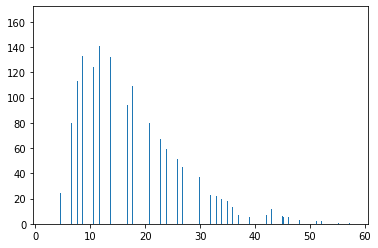

In [145]:
# Access
plt.hist(CDC_500_cities_data["Access"], bins=len(CDC_500_cities_data["Access"])//5);

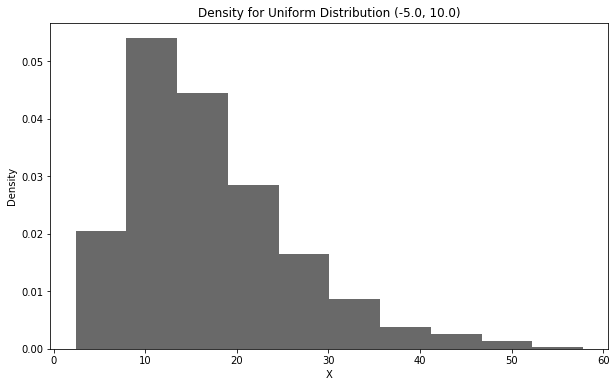

In [195]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist( CDC_500_cities_data["Access"], density=True, color="DimGray") # a density
axes.set_ylabel( "Density")
axes.set_xlabel( "X")
axes.set_title( "Density for Uniform Distribution (-5.0, 10.0)")

plt.show()

In [198]:
print( "low =", min(CDC_500_cities_data["Access"]))
print( "high=", max(CDC_500_cities_data["Access"]))

low = 2.4
high= 57.8


In [199]:
print( "m1=", np.mean(CDC_500_cities_data["Access"]))
print( "m2=", np.var(CDC_500_cities_data["Access"]))

m1= 17.19574921579667
m2= 80.26098852618625


In [153]:
print(skewtest(CDC_500_cities_data["Access"]))

SkewtestResult(statistic=60.31487635371287, pvalue=0.0)


In [157]:
log_transform_array = np.log(CDC_500_cities_data['Access'])
log10_transform_array = np.log10(CDC_500_cities_data['Access'])
root_transform_array = np.sqrt(CDC_500_cities_data["Access"])
box_cox_transform_array,box_cox_lambda = boxcox(CDC_500_cities_data['Access'])[0], boxcox(CDC_500_cities_data['Access'])[1]

In [158]:
print(skewtest(log_transform_array))
print(skewtest(log10_transform_array))
print(skewtest(root_transform_array))
print(skewtest(box_cox_transform_array))

SkewtestResult(statistic=-2.8773711610210073, pvalue=0.00401003624845079)
SkewtestResult(statistic=-2.8773711610209762, pvalue=0.004010036248451191)
SkewtestResult(statistic=32.781706669514044, pvalue=1.0733240186667228e-235)
SkewtestResult(statistic=-0.18778079622133279, pvalue=0.8510484903600288)


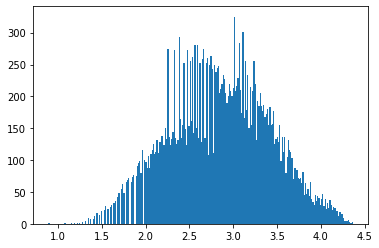

In [159]:
# BoxCox transform will normalize the data
plt.hist(box_cox_transform_array, bins=len(box_cox_transform_array)//100);

In [160]:
#This will be our y value
CDC_500_cities_data["Access_norm"] = box_cox_transform_array

## (Brief) Exploratory Data Analysis

### Pair-Wise: Attribute by Class

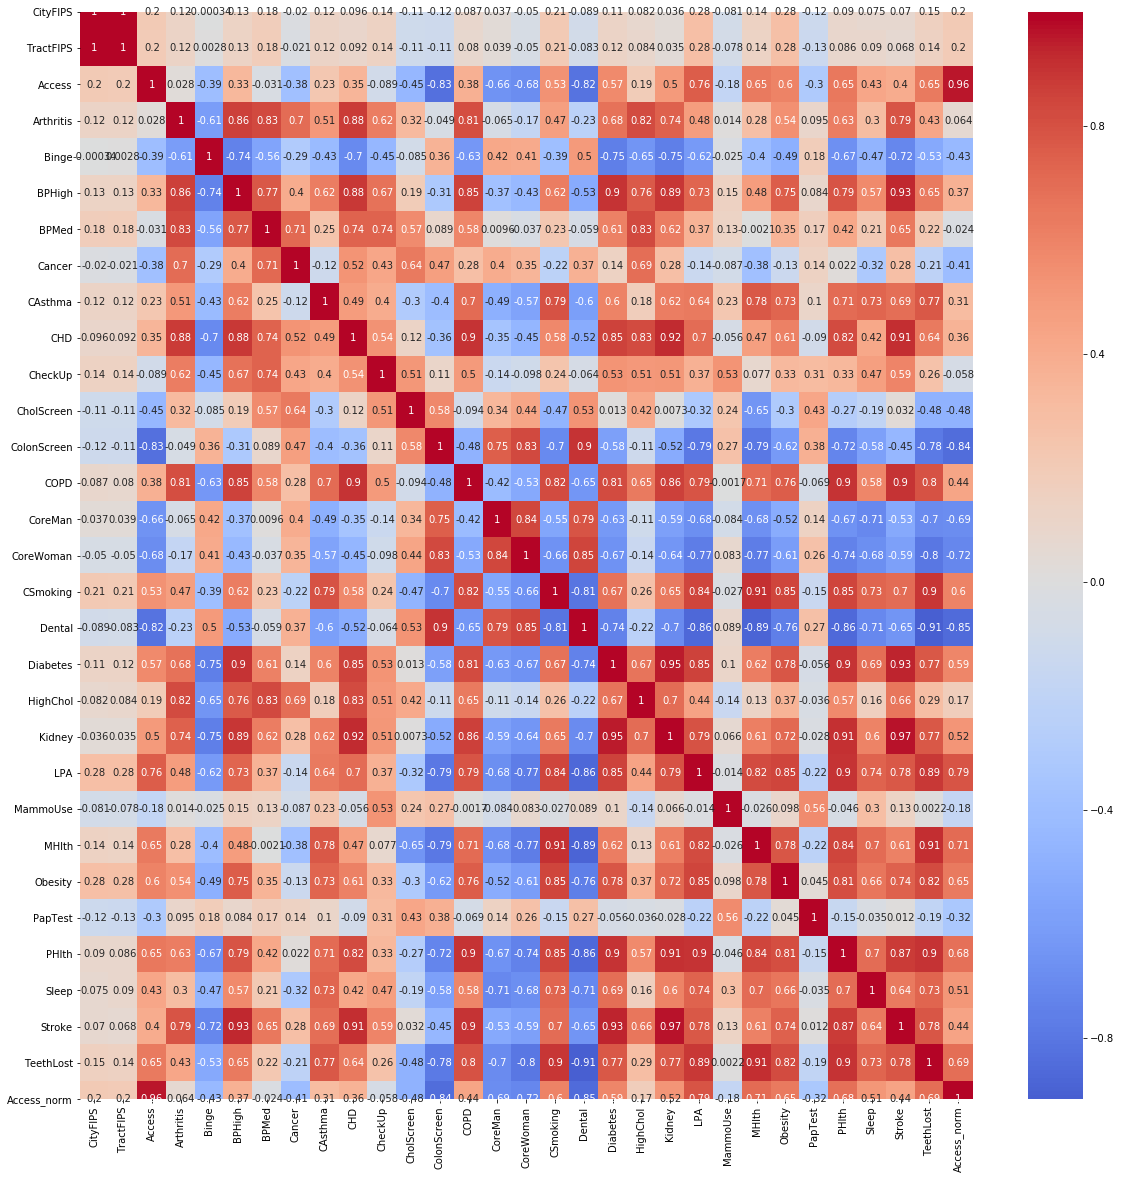

In [161]:
#Looking for potential covariance as well as correlation of variables with per capita income
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(CDC_500_cities_data.corr(), annot = True, ax= ax, cmap="coolwarm", center = 0)

In [ ]:
import models
#Use models.py to generate linear regeression model
results = models.linear_regression ( "y ~ x", data )
models.simple_describe_lr ( results )

In [ ]:
figure = plt.figure ( figsize = ( 4, 3 ) )

axes = figure.add_subplot ( 1, 1, 1 )
axes.scatter ( CDC_500_cities_data.Access, CDC_500_cities_data.CityTractID, color = "dimgray", alpha = 0.8 )

beta = results [ "coefficients" ]
axes.plot ( data.x, [ beta [ 0 ] + beta [ 1 ] * x for x in data.x ], '-', color = "midnightblue", alpha = 0.75 )

axes.set_ylabel ( r"$y$" )
axes.set_xlabel ( r"$x$" )
axes.set_title ( r"Plot of $y$ v. $x$" )
axes.set_ylim ( ( 70, 140 ) )
plt.show()
plt.close()

In [169]:
CDC_500_cities_data.columns

Index(['State', 'City', 'CityFIPS', 'TractFIPS', 'CityTractID', 'Population',
       'Access', 'Access95CI', 'Arthritis', 'Arthritis95CI', 'Binge',
       'Binge95CI', 'BPHigh', 'BPHigh95CI', 'BPMed', 'BPMed95CI', 'Cancer',
       'Cancer95CI', 'CAsthma', 'CAsthma95CI', 'CHD', 'CHD95CI', 'CheckUp',
       'CheckUp95CI', 'CholScreen', 'CholScreen95CI', 'ColonScreen',
       'ColonScreen95CI', 'COPD', 'COPD95CI', 'CoreMan', 'CoreMan95CI',
       'CoreWoman', 'CoreWoman', 'CSmoking', 'CSmoking95CI', 'Dental',
       'Dental95CI', 'Diabetes', 'Diabetes95CI', 'HighChol', 'HighChol95CI',
       'Kidney', 'Kidney95CI', 'LPA', 'LPA95CI', 'MammoUse', 'MammoUse95CI',
       'MHlth', 'MHlth95CI', 'Obesity', 'Obesity95CI', 'PapTest',
       'PapTest95CI', 'PHlth', 'PHlth95CI', 'Sleep', 'Sleep95CI', 'Stroke',
       'Stroke95CI', 'TeethLost', 'TeethLost95CI', 'Geolocation',
       'Access_norm'],
      dtype='object')

In [173]:
CDC_500_cities_data.head()

,State,City,CityFIPS,TractFIPS,CityTractID,Population,Access,Access95CI,Arthritis,Arthritis95CI,...,PHlth,PHlth95CI,Sleep,Sleep95CI,Stroke,Stroke95CI,TeethLost,TeethLost95CI,Geolocation,Access_norm
0,AL,Birmingham,107000,1073000100,0107000-01073000100,"3,042",24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",...,20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)",3.383953
1,AL,Birmingham,107000,1073000300,0107000-01073000300,"2,735",30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",...,22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)",3.631353
2,AL,Birmingham,107000,1073000400,0107000-01073000400,"3,338",24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",...,19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)",3.397653
3,AL,Birmingham,107000,1073000500,0107000-01073000500,"2,864",25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",...,21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)",3.420133
4,AL,Birmingham,107000,1073000700,0107000-01073000700,"2,577",29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",...,25.5,"(23.1, 28.0)",48.3,"(46.6, 49.7)",9.0,"( 8.1, 10.0)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)",3.578137


In [175]:
## Lasso For Feature Selection
temp_df = CDC_500_cities_data.drop(["State", "City"], axis = 1, inplace=False)

In [178]:
## Lasso For Feature Selection
temp_df = CDC_500_cities_data.drop(["CityFIPS", "TractFIPS", "CityTractID", "Geolocation"], axis = 1, inplace=False)

In [180]:
## Lasso For Feature Selection
temp_df = CDC_500_cities_data.drop(["Arthritis95CI", "Binge95CI", "BPHigh95CI", "BPMed95CI", "Cancer95CI", "CAsthma95CI", "CHD95CI" , "CheckUp95CI", "CholScreen95CI"], axis = 1, inplace=False)


In [186]:
## Lasso For Feature Selection
temp_df = CDC_500_cities_data.drop(["ColonScreen95CI", "COPD95CI"], axis = 1, inplace=False)

In [190]:
## Lasso For Feature Selection
temp_df = CDC_500_cities_data.drop(["CoreMan95CI"], axis = 1, inplace=False)


In [191]:
## Lasso For Feature Selection
temp_df = CDC_500_cities_data.drop(["CoreMan95CI", "CSmoking95CI", "Dental95CI", "Diabetes95CI","HighChol95CI"], axis = 1, inplace=False)

In [192]:
## Lasso For Feature Selection
temp_df = CDC_500_cities_data.drop(["Kidney95CI","MammoUse95CI","MHlth95CI", "Obesity95CI", "PapTest95CI","PHlth95CI", "Sleep95CI", "Stroke95CI", "TeethLost95CI"], axis = 1, inplace=False)

In [193]:
temp_df.dropna(inplace=True)
temp_X = temp_df.drop(["Access"], axis=1, inplace = False)
temp_y = temp_df["Access_norm"]

ss = StandardScaler()
ss.fit(temp_X)
temp_X_scaled = ss.transform(temp_X)

reg = LassoCV()
reg.fit(temp_X_scaled, temp_y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(temp_X_scaled,temp_y))
coef = pd.Series(reg.coef_, index = temp_X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model");

/Users/riccacallis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ValueError: could not convert string to float: 'AL'

In [107]:
# Frequency of diagnoses classifications
CDC_500_cities_data [ 'State' ].value_counts() # raw counts

CA    5214
TX    2933
NY    2452
FL    1286
IL    1283
OH     820
NC     752
MI     723
CO     679
PA     628
IN     514
TN     506
VA     496
MA     481
OK     460
GA     442
MO     426
WI     398
LA     367
NV     356
AL     340
OR     336
MN     310
NJ     301
KS     298
KY     261
UT     229
HI     227
NE     211
NM     206
IA     190
DC     178
SC     162
MS      73
ID      67
SD      56
AK      55
MT      43
ND      25
DE      24
WV      22
ME      20
WY      16
Name: State, dtype: int64

In [108]:
# Frequency of diagnoses classifications
CDC_500_cities_data [ 'City' ].value_counts() # raw counts

New York        2110
Los Angeles      993
Chicago          794
Houston          544
Philadelphia     375
                ... 
Allen             11
Perris            10
Fishers            9
Pharr              9
Meridian           8
Name: City, Length: 431, dtype: int64

In [109]:
# Frequency of diagnoses classifications
CDC_500_cities_data [ 'CityFIPS' ].value_counts() # raw counts

3651000    2110
644000      993
1714000     794
4835000     544
4260000     375
           ... 
4548535      11
656700       10
1823278       9
4857200       9
1652120       8
Name: CityFIPS, Length: 453, dtype: int64

In [110]:
# Frequency of diagnoses classifications
CDC_500_cities_data [ 'TractFIPS' ].value_counts() # raw counts

48157670700    3
6059099203     3
6059086801     2
6071001703     2
40143007508    2
              ..
1125012800     1
11001009907    1
40109106502    1
26161403200    1
12071010304    1
Name: TractFIPS, Length: 24652, dtype: int64

In [111]:
# Frequency of diagnoses classifications
CDC_500_cities_data [ 'CityTractID' ].value_counts() # raw counts

4164900-41047001701    1
2938000-29047021205    1
4865000-48029121117    1
4659020-46099001001    1
3651000-36005007900    1
                      ..
4752006-47037018905    1
0668000-06085503326    1
0644000-06037199202    1
1919000-19163012000    1
2754880-27109001100    1
Name: CityTractID, Length: 24866, dtype: int64

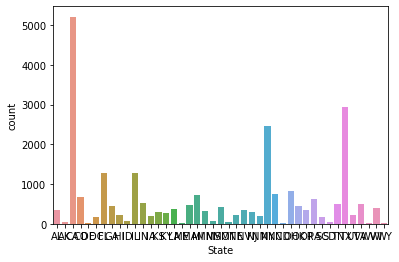

In [112]:
# Plot diagnosis frequencies
sns.countplot ( CDC_500_cities_data [ 'State' ],label = "Count" ) # boxplot

In [113]:
def describe_by_category ( data, numeric, categorical, transpose = False ):
    grouped = data.groupby ( categorical )
    grouped_y = grouped [ numeric ].describe()
    if transpose:
        print( grouped_y.transpose() )
    else:
        print ( grouped_y )

In [ ]:

CAsthma

CHD

CheckUp

CholScreen

ColonScreen

COPD

CoreMan

CoreWoman

CSmoking

Dental

Diabetes

HighChol

Kidney

LPA

MammoUse

MHlth

Obesity

PapTest
PHlth

Sleep

Stroke

TeethLost


In [121]:
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Access' ].mean()

State
AK    12.790909
AL    17.985294
CA    14.739087
CO    13.618115
DC     8.759551
DE    19.258333
FL    23.805599
GA    21.995249
HI     8.952863
IA    11.433158
ID    15.482090
IL    16.750896
IN    15.293969
KS    18.228523
KY     9.546743
LA    15.144414
MA    11.227859
ME    12.940000
MI    14.343292
MN    12.336774
MO    17.053991
MS    22.136986
MT    11.451163
NC    17.691223
ND    10.268000
NE    15.280095
NJ    23.269435
NM    13.868447
NV    17.954775
NY    15.810848
OH    13.947439
OK    17.760000
OR    12.146429
PA    13.284713
SC    16.061728
SD    11.555357
TN    19.558103
TX    27.557416
UT    16.662009
VA    14.867742
WI    13.862312
WV    10.813636
WY    16.318750
Name: Access, dtype: float64

In [122]:
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Access'].describe()

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
AK,55.0,12.790909,3.226871,6.8,10.350,12.80,14.800,21.1
AL,340.0,17.985294,6.266106,6.6,12.300,18.15,23.125,33.7
CA,5214.0,14.739087,7.566661,3.6,8.500,12.90,19.500,42.7
CO,679.0,13.618115,6.622745,5.0,8.900,11.40,16.900,38.1
DC,178.0,8.759551,3.806661,3.4,5.225,8.40,11.700,19.8
DE,24.0,19.258333,6.691131,6.6,15.450,18.85,23.500,33.5
FL,1286.0,23.805599,8.354791,8.7,17.700,22.50,28.600,52.4
GA,442.0,21.995249,7.705456,7.8,15.600,22.20,28.050,45.3
HI,227.0,8.952863,2.760936,4.4,7.200,8.60,10.050,22.2


In [131]:
# Descriptive Statistics: Access by State
describe_by_category ( CDC_500_cities_data, "Access", "State", transpose = True )

State         AK          AL           CA          CO          DC         DE  \
count  55.000000  340.000000  5214.000000  679.000000  178.000000  24.000000   
mean   12.790909   17.985294    14.739087   13.618115    8.759551  19.258333   
std     3.226871    6.266106     7.566661    6.622745    3.806661   6.691131   
min     6.800000    6.600000     3.600000    5.000000    3.400000   6.600000   
25%    10.350000   12.300000     8.500000    8.900000    5.225000  15.450000   
50%    12.800000   18.150000    12.900000   11.400000    8.400000  18.850000   
75%    14.800000   23.125000    19.500000   16.900000   11.700000  23.500000   
max    21.100000   33.700000    42.700000   38.100000   19.800000  33.500000   

State           FL          GA          HI          IA  ...          PA  \
count  1286.000000  442.000000  227.000000  190.000000  ...  628.000000   
mean     23.805599   21.995249    8.952863   11.433158  ...   13.284713   
std       8.354791    7.705456    2.760936    4.211977

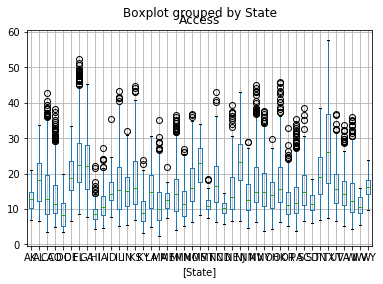

In [129]:
boxplot = CDC_500_cities_data.boxplot ( column = [ 'Access' ], by = [ 'State' ] )

In [123]:
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Binge' ].mean()

State
AK    20.229091
AL    13.130000
CA    18.364327
CO    19.104860
DC    22.579775
DE    15.191667
FL    16.309876
GA    15.473077
HI    19.362115
IA    20.371053
ID    16.407463
IL    20.632112
IN    16.670623
KS    17.378523
KY    18.448659
LA    19.004905
MA    20.080873
ME    20.180000
MI    16.451452
MN    21.639032
MO    19.417136
MS    13.046575
MT    23.032558
NC    16.919947
ND    24.896000
NE    22.111848
NJ    15.784053
NM    16.087379
NV    19.252809
NY    17.758809
OH    17.574024
OK    14.522391
OR    19.142857
PA    19.759236
SC    18.787654
SD    18.521429
TN    13.894862
TX    18.590829
UT    12.659825
VA    17.851815
WI    23.974372
WV    11.836364
WY    17.193750
Name: Binge, dtype: float64

In [ ]:
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Binge'].describe()

In [ ]:
# Descriptive Statistics: Binge by State
describe_by_category ( CDC_500_cities_data, "Binge", "State", transpose = True )

In [ ]:
boxplot = CDC_500_cities_data.boxplot ( column = [ 'Binge' ], by = [ 'State' ] )

In [ ]:
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'BPHigh' ].mean()

In [ ]:
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'BPHigh' ].describe()

In [ ]:
# Descriptive Statistics: High Blood Pressure by State
describe_by_category ( CDC_500_cities_data, "BPHigh", "State", transpose = True )

In [ ]:
boxplot = CDC_500_cities_data.boxplot ( column = [ 'BPHigh' ], by = [ 'State' ] )

In [ ]:
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'BPMed' ].mean()

In [ ]:
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'BPMed' ].describe()

In [ ]:
# Descriptive Statistics: Blood Pressure Medication by State
describe_by_category ( CDC_500_cities_data, "BPMed", "State", transpose = True )

In [ ]:
boxplot = CDC_500_cities_data.boxplot ( column = [ 'BPMed' ], by = [ 'State' ] )

In [ ]:
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Cancer' ].mean()

In [ ]:
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Cancer' ].describe()

In [ ]:
# Descriptive Statistics: Cancer by State
describe_by_category ( CDC_500_cities_data, "Cancer", "State", transpose = True )

In [ ]:
boxplot = CDC_500_cities_data.boxplot ( column = [ 'Cancer' ], by = [ 'State' ] )

In [ ]:
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CAsthma' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CAsthma' ].describe()
# Descriptive Statistics: Current Asthma  by State
describe_by_category ( CDC_500_cities_data, "CAsthma", "State", transpose = True )
boxplot = CDC_500_cities_data.boxplot ( column = [ 'CAsthma' ], by = [ 'State' ] )
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CHD' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CHD' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CheckUp' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CheckUp' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CholScreen' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CholScreen' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'ColonScreen' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'ColonScreen' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'COPD' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'COPD' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CoreMan' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CoreMan' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CoreWoman' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CoreWoman' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CSmoking' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'CSmoking' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Dental' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Dental' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Diabetes' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Diabetes' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'HighChol' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'HighChol' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Kidney' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Kidney' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'LPA' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'LPA' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'MammoUse' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'MammoUse' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'MHlth' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Mhlth' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Obesity' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Obesity' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'PapTest' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'PapTest' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'PHlth' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'PHlth' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Sleep' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Sleep' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Stroke' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'Stroke' ].describe()
# Descriptive Statistics: Describe each variable by class (means only)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'TeethLost' ].mean()
# Descriptive Statistics: Describe each variable by class (all descriptive stats)
CDC_500_cities_data.groupby ( [ 'State' ] )[ 'TeethLost' ].describe()


In [134]:
import glob
glob_list = glob.glob('500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release.csv')
frame = pd.DataFrame()
for file in glob_list:
 df = pd.read_csv(file)
 frame = frame.join(df, lsuffix='Fact', rsuffix='Fact', how='right')

In [139]:
cities['Obesity'] = pd.qcut(cities['Obesity'], 3, labels = ['low', 'medium', 'high'])

NameError: name 'cities' is not defined

In [140]:
rf = RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
rf_pred = grid_search.predict(X_test)
grid_search.score(X_test,y_test)
grid_search.best_params_
print(classification_report(y_test, rf_pred))

NameError: name 'RandomForestClassifier' is not defined